# Chapter 11 Virtual Work

## Section 11.1 Definition of Work
* A force does work when it undergoes a displacement in the direction of its line of action
* Consider $\vec F$ that undergoes displacement $d\vec r$, let $\theta$ be the angle between the force and displacement, then the component of $\vec F$ in the direction of displacement is $F \cos \theta$ , the work produced by $\vec F$ is $dU = F dr \cos \theta$
* We can simplify this by writing it in terms of dot product, $dU = \vec F \cdot d\vec r$
* Work is a scalar and can be positive or negative, the unit for work is joule ($N \cdot m$)
* Rotation of a couple moment is another way work is created
* Consider a rigid body which is acted upon by couple forces $\vec F$ and $-\vec F$ which produce couple moment $\vec M$, with magnitude $M = Fr$, If the body undergoes differential displacement then points $A$ and $B$ in the body move $d\vec r_A$ and $d\vec r_B$ to positions $A'$ and $B'$, since $d\vec r_B = d\vec r_1 + d\vec r'$ is can be seen as a translation $d\vec r_A$ where $A$ and $B$ move to $A'$ and $B"$, then there is a rotation about $A'$ where the body rotates the angle $d\theta$ about $A$, the couple forces do not work during the translation as each force undergo the same amount of displacement but in opposite directions, and cancelling out. When the body rotates $\vec F$ is displaced $dr' = r d\theta$ and it does work $dU = F dr' = Fr d\theta$, since $M = Fr$ then $dU = M d\theta$. When $\vec M$ and $d\theta$ have the same sense then work is positive, if they have opposite sense work is negative
* Virtual movement of a body in a static equilibrium indicates a displacement or rotation that is assumed and does not exist
* This movement is a first-order differential quantity and are denoted $\delta r$ and $\delta \theta$
* Virtual work done by a force having virtual displacement $\delta r$ is $\delta U = F \cos \theta \delta r$ &emsp; (11-1)
* Virtual work done by a couple undergoing virtual rotation $\delta \theta$ is $\delta U = M \delta \theta$ &emsp; (11-2)

## Section 11.2 Principle of Virtual Work
* Principle of work - states that if a body is in equilibrium then the sum of the virtual work done by all the forces and couple moments acting on the body is zero for any virtual displacements of the body, i.e. $\delta U = 0$ &emsp; (11-3)
* Consider a particle that is resting on a floor, let the ball be displaced down a virtual amount $\delta y$, then the weight does positive virtual work $W \delta y$ and the normal force does negative work $-N \delta y$, since total virtual work must be zero, $\delta U = W \delta y -N \delta y = (W-N) \delta y = 0$, since $\delta y \neq 0$ then $N = W$ from $\sum F_y = 0$
* Virtual work equation $\delta U = 0$ can be used on a rigid body subjected to a coplanar force system, in this system we can separate virtual transitions in the $x$ and $y$ directions, and a virtual rotation about an axis perpendicular to the $x$-$y$ plane that passes through arbitrary point $O$, will correspond to the equilibrium equations, when using these equations it is not needed to include work done by internal forces acting in the body since a rigid body does not deform when under an external load, when the body moves a virtual displacement the internal forces occur in equal but opposite collinear pairs so the work done by each pair will cancel
* There is no advantage gained from solving equilibrium problems using the principle of virtual work, this is because for every application of the virtual work equation the virtual displacement factors out and the equation can be found just by applying the equation of equilibrium

## Section 11.3 Principle of Virtual Work for a System of Connected Rigid Bodies
* Method of virtual work is effective in solving equilibrium problems that involve a system of several connected rigid bodies
* Consider a system of connected rigid bodies, arrange the links, so they are all specified using one coordinate $\theta$ then the system only has one degree of freedom, i.e. with $\theta$ and the length of the members we can locate the position of forces $\vec F$ and $\vec P$
* Forces or couple moments that do not virtually displace do no virtual work
### Procedure for Analysis - Virtual work
* Draw FBD of the system of connected bodies, define coordinate $q$
* Draw sketch of deflected position of the system on FBD when the system undergoes positive virtual displacement $\delta q$
* Indicate position coordinates $s$ measured from a fixed point on the FBD, these coordinates are directed to the forces that do work
* Each coordinate axes should be parallel to the line of action of the force it is directed at, so the virtual work along the coordinate axis can be calculated
* Relate the position coordinates $s$ to coordinate $q$, then differentiate the expression to express every virtual displacement $\delta s$ in terms of $\delta q$
* Write virtual work equation for the system and assume each position coordinate $s$ undergoes positive virtual displacement $\delta s$, if a force or couple moment is in the same direction as the positive virtual displacement then work is positive, if it is the opposite direction the work is negative
* Write the work of every force and couple moment in an equation in terms of $\delta q$
* Factor out common displacement from all the terms, solve for unknown force, couple moment, or equilibrium position $q$

# Problem 17
When $\theta = 30\degree$, the 25-kg uniform block compresses the two horizontal springs 100 mm. Determine the magnitude of the applied couple moments $\mathbf{M}$ needed to maintain equilibrium. Take $k = 3 \textrm{ kN/m}$ and neglect the mass fo the links.

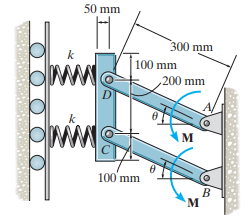

In [1]:
from IPython.display import Image
Image("pictures/problem_11_17.png")

In [2]:
from scipy.optimize import fsolve
from sympy import symbols
import numpy as np

theta = np.radians(30)
DC = 200e-3
member = 400e-3
DA = 300e-3
CB = 300e-3
thickness = 50e-3
weight = 25 * 9.81
k = 3e3
compression = 100e-3
delta_theta, M = symbols('delta_theta M')

F_s = k * compression

#virtual displacement
x = CB * np.cos(theta) + thickness
y = CB * np.sin(theta) + 1/2 * DC
delta_x = -CB * np.sin(theta) * delta_theta
delta_y = CB * np.cos(theta) * delta_theta

#virtual work equation
#delta_U = 0, -2 * F_s * delta_x -weight * delta_y - 2 * M  * delta_theta = 0
# (-2 * F_s * -CB * np.sin(theta) * delta_theta - weight * CB * np.cos(theta) * delta_theta - 2 * M * delta_theta = 0
# -2 * F_s * -CB * np.sin(theta) - weight * CB * np.cos(theta) - 2 * M = 0

def moment_function(M):
    return -2 * F_s * -CB * np.sin(theta) - weight * CB * np.cos(theta) - 2 * M
moment = fsolve(moment_function,1)[0]
print(f' Magnitude of the moments = {moment:.2f} N m')

 Magnitude of the moments = 13.14 N m


## Section 11.4 Conservative Forces
* Conservative force - a force that does work that only depends on the initial and final positions of the force, and it is independent of the path it takes
* Consider a block with weight $\vec W$ that travels along a path, assume it is displaced up by $d\vec r$ then the work is $dU = \vec W \cdot d\vec r = -W(dr \cos \theta) = -W dy$, work is negative since $\vec W$ and $d\vec r$ act in opposite directions, let the block move from a point $A$ to point $B$ with vertical displacement $h$, then work is $U = \int_0^h Wdy = -Wh$
* The weight of a body is a conservation force since the work only depends on the vertical displacement of the body and is independent of the path traveled
* Consider a linearly elastic spring that undergoes displacement $ds$, work done by the spring force on the block is $dU = -F_s ds = -ks ds$, work is negative since $\vec F_s$ acts in the opposite direction of ds, the work of $\vec F_s$ when block is displaced from $s = s_1$ to $s=s_2$ is $U = -\int_{s_1}^{s_2}{ks ds} = -(\frac{1}{2} k s_2^2 - \frac{1}{2} k s_1^2)$
* The work only depends on the spring's initial and final positions, this is independent of the path taken by the block as it moves, therefore the spring is a conservation force
* Consider a friction force of a sliding body on a fixed surface, the work done by this force depends on the path, specifically the length, the longer the path the more work done, therefore frictional forces are nonconservative, most of the work done by frictional forces is dissipated from the body by heat

## Section 11.5 Potential Energy
* A conservative force can give a body the capacity to do work, the capacity is measured aa potential energy and depends on the location of the body measured relative to a fixed reference position or datum
* When a body is located distance $y$ above a fixed horizontal reference then the weight of the body has positive gravitational potential energy $V_g$ since $\vec W$ has the capacity of doing positive work when the body is moved down to the reference point
* If the body is located distance $y$ below a fixed horizontal reference then the weight of the body has negative gravitational potential energy $V_g$ since $\vec W$ has the capacity of doing negative work when the body is moved up to the reference point
* When the body is at the reference point then $V_g = 0$
* We can measure the gravitational potential energy of a body's weight with $V_g = Wy$ &emsp; (11-4), with $y$ measured as positive upward
* If a spring is compressed or elongated by $s$ from its unstretched position the energy stored in the spring, called elastic potential energy, is measured by $V_e = \frac{1}{2} k s^2$ &emsp; (11-5)
* Elastic potential energy is always positive because the spring force acting on the attached body does positive work on the body since the force returns the body to the spring's unstretched position
* When a body is subjected to gravitational and elastic forces the potential energy of the body can be written as the sum of the forces, $V = V_g + V_e$ &emsp; (11-6)
* When a system of frictionless connected rigid body has only one degree of freedom such that its vertical distance from the datum is defined by coordinate $q$ then the potential energy for the system can be expressed as $V = V(q)$, work done by the weight and spring forces acting on the system in moving from $q_1$ to $q_2$ can be measured by the difference in $V$, $U_{1-2} = V(q_1) - V(q_2)$ &emsp; (11-7)
* Consider a system with a block with weight $\vec W$ supported by a spring, the potential energy can be expressed in terms of coordinate $q = y$ which is measured from a fixed reference point that is at the unstretched length of the spring, $V = V_g + V_e = -Wy + \frac{1}{2} k y^2$ &emsp; (11-8)
* Consider the block moving from $y_1$ to $y_2$ using (11-7) the work of the forces is $U_{1-2} = V(y_1) - V(y_2) = -W(y_1 - y_2) + \frac{1}{2}k y_1^2 - \frac{1}{2} k y_2^2$

## Section 11.6 Potential-Energy Criterion for Equilibrium
* When a frictionless connected system has one degree of freedom and the position is defined by coordinate $q$ then if it displaced from $q$ to $dq$ then (11-7) becomes $dU = V(q) - V(q+dq)$ or $dU = -dV$
* When a system in equilibrium undergoes a virtual displacement $\delta q$ instead of real displacement $dq$ then this equation becomes $\delta U = -\delta V$, but since the principle of virtual work requires $\delta U = 0$ then $\delta V = 0$ so $\delta V = \frac{dV}{dq} \delta q = 0$ and $\delta q \neq 0$ then this expression is $\frac{dV}{dq} = 0$ &emsp; (11-9)
* From this we see that when a frictionless connected system of rigid bodies is in equilibrium the first derivative of its potential energy is $0$
* Using this we can determine the equilibrium position of the block on a spring system mentioned before, $\frac{dV}{dy} = -W + ky = 0$ therefore the equilibrium position is $y_{eq} = \frac{W}{k}$

## Section 11.7 Stability of Equilibrium Configuration
* The potential function $V$ of a system can be used to investigate the stability of equilibrium configuration which can be classified as stable, neutral, or unstable
* A system is in stable equilibrium if the system has a tendency to return to its original position when a small displacement is given to the system, the potential energy of this system is at its minimum
* A system is in neutral equilibrium if the system remains in equilibrium when the system is given a small displacement away from its original, the  potential energy of this system is a constant
* A system is in unstable equilibrium if the system has a tendency to be displaced farther away from its original equilibrium position when it is given a small displacement, the potential energy of this system is a maximum
* When a system only has one degree of freedom and its position is defined by coordinate $q$, then potential function $V$ for the system in terms of $q$ can be graphed, provided the system is in equilibrium then $\frac{dV}{dq}$ is the slope of this function and must equal $0$, to look at the stability at equilibrium we need the second derivative of the potential function
* When $\frac{d^2V}{dq^2} > 0$ then the potential energy of the system will be a minimum, this means the equilibrium configuration is stable, $\frac{dV}{dq} = 0, \frac{d^2V}{dq^2} > 0 \Rightarrow$ stable equation &emsp; (11-10)
* When $\frac{d^2V}{dq^2} < 0$ then the potential energy of the system will be a maximum, this means the equilibrium configuration is unstable, $\frac{dV}{dq} = 0, \frac{d^2V}{dq^2} < 0 \Rightarrow$ unstable equation &emsp; (11-11)
* When $\frac{d^2V}{dq^2} = 0$ we need to look at the higher order derivatives to determine stability, the equilibrium configuration will be stable if the first non-zero derivative is of an even order and is positive, the equilibrium configuration will be unstable if the first non-zero derivative is odd or if it is even and negative, if all higher order derivatives are $0$ then the system is in neutral equilibrium, $\frac{dV}{dq} = \frac{d^2V}{dq^2} = \frac{d^3V}{dq^3} = ... = 0 \Rightarrow$ neutral equilibrium &emsp; (11-12)
* This only occurs if the potential function for the system is constant at or around the neighborhood of $q_{eq}$
### Procedure for Analysis - stability of a system
* Sketch the system with arbitrary position specified by coordinate $q$
* Establish horizontal datum through a fixed point and express $V_g$ in terms of weight $W$ of each member and its vertical distance $y$ from the datum, $V_g = Wy$
* Express $V_e$ of the system in terms of the stretch or compression $s$ of any connecting spring $V_e = \frac{1}{2} k s^2$
* Form potential function $V = V_g + V_e$ and express the position coordinates $y$ and $s$ in terms of single coordinate $q$
* Equilibrium position of the system is determined by taking the first derivative of $V$ and setting it equal to zero, $\frac{dV}{dq} = 0$
* Stability at equilibrium position is determined by evaluating the second or higher order derivatives of $V$
* If second derivative is greater than zero the system is stable, if all derivatives are equal to zero the system is in neutral equilibrium, if the second derivative is less than zero the system is unstable

# Problem 35
The two bars each have a weight of 8 lb. Determine the required stiffness $k$ of the spring so that the two bars are in equilibrium when $\theta = 30\degree$. The spring has an unstretched length of 1 ft.

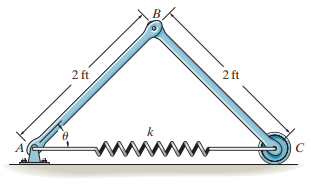

In [3]:
from IPython.display import Image
Image("pictures/problem_11_35.png")

In [4]:
import numpy as np
from sympy import diff, symbols, sin, cos
from scipy.optimize import fsolve

theta = np.radians(30)
spring_length = 1  #ft
bar_weight = 8
k,theta_1 = symbols('k theta_1')
s = 4 * cos(theta_1) - 1

V_g = bar_weight * 2 * sin(theta_1)
V_e = 1/2 * k * s**2
V = V_g + V_e
V_prime_1 = diff(V,theta_1)
print(V_prime_1)
V_prime = 2 * bar_weight * np.cos(theta) + k * (4 * np.cos(theta) - 1) * -4 * np.sin(theta)


def spring_function(k):
    return 2 * bar_weight * np.cos(theta) + k * (4 * np.cos(theta) - 1) * -4 * np.sin(theta)


spring_constant = fsolve(spring_function,1)[0]
print(f' stiffness = {spring_constant:.2f} lb/ft')


-4.0*k*(4*cos(theta_1) - 1)*sin(theta_1) + 16*cos(theta_1)
 stiffness = 2.81 lb/ft
